In [1]:
from util import *
from sklearn.model_selection import KFold

### 0. Load data for RF and SVM

train.csv and test.csv is formed manually from features_3_sec.csv such that they contain good mix of all types of genre. This dataset is used everywhere everywhere except in 1.2. In 1.2, we used features_30_sec.csv for testing out best hyper parameters using randomized cross validation.

In [2]:
X_train, y_train = load_preprocess_xy('data/train.csv',0, True, False, False) #scale X, no encode y, no dummify y
X_test, y_test = load_preprocess_xy('data/test.csv',0, True, False, False)

# 1. Random Forest

In [3]:
from random_forest import *

### 1.1. Use hyper parameters obtained with randomized search cross validation with some changes

Hypperparameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Accuracy:  86.33633633633634


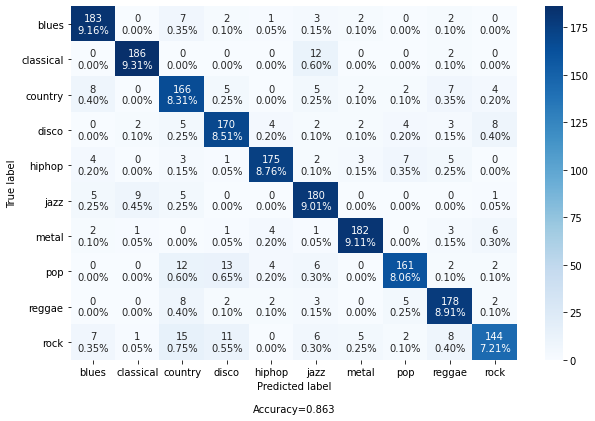

In [4]:
fit_predict_print(rf_fit_predict, X_train, y_train, X_test, y_test)

Note that all confusion matrix show result of predicting genre of tracks in test data. So its test accuracy, not train accuracy. 

### 1.2. Search for best hyperparameters by doing randomized cross validation (on 30 sec data set)

Load 30s data.

In [5]:
X30_train, X30_test, y30_train, y30_test = load_preprocess_xy('data/features_30_sec.csv',20, True, False, False) 

Run randomized search CV

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.4min finished


Accuracy:  75.0
Hyperparamters:  {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': False}


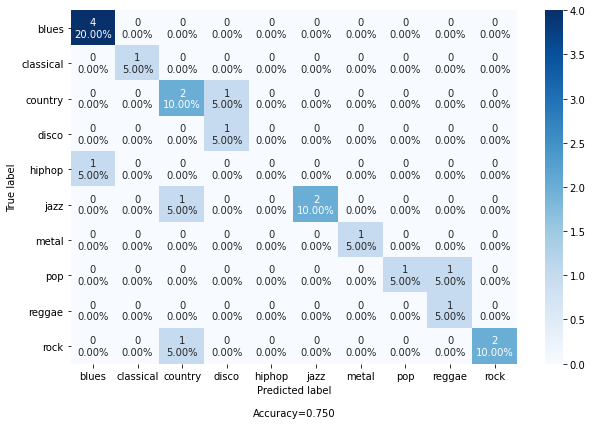

In [6]:
search_fit_predict_print(randomized_search_cv_rf_fit_predict, X30_train, y30_train, X30_test, y30_test)

# 2. K-Means

In [7]:
from k_means import *

X_train_1, y_train_1 = load_preprocess_xy('data/train.csv',0, True, True, False)
X_test_1, y_test_1 = load_preprocess_xy('data/test.csv',0, True, True, False)

### 2.1. Find number clusters by the elbow method

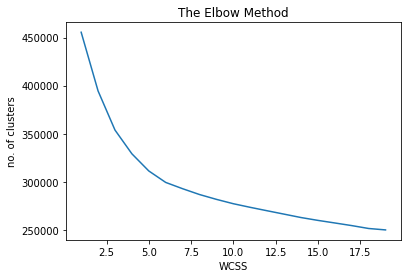

In [8]:
elbow(X_train_1)

### 2.2. Running KMeans with 10 clusters

Accuracy:  10.86086086086086


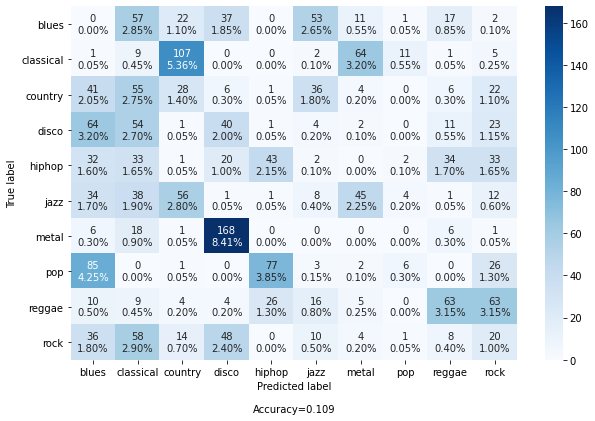

In [9]:
fit_predict_print_unsupervised(kmeans_fit_predict, X_train_1, X_test_1, y_test_1)

# 3. Neural Network

In [10]:
from ann import *

### 3.1. Load data, scale X, encode and dummify y for KFold

In [11]:
X, y = load_preprocess_xy('data/features_3_sec.csv',0, True, True, True)

### 3.2.  Trying out KFold on ANN

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2567 - accuracy: 0.5591
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.7902 - accuracy: 0.7310
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6524 - accuracy: 0.7790
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5593 - accuracy: 0.8091
Epoch 5/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4924 - accuracy: 0.8327
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8493
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.8654
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3577 - accuracy: 0.8775
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8889
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2936 - accura

800/800 [==============================] - 1s 1ms/step - loss: 0.0230 - accuracy: 0.9921
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0105 - accuracy: 0.9972
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0065 - accuracy: 0.9980
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0624 - accuracy: 0.9835
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0254 - accuracy: 0.9911
Epoch 86/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 87/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0087 - accuracy: 0.9970
Epoch 88/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0179 - accuracy: 0.9939
Epoch 89/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9896
Epoch 90/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0193 - accuracy: 

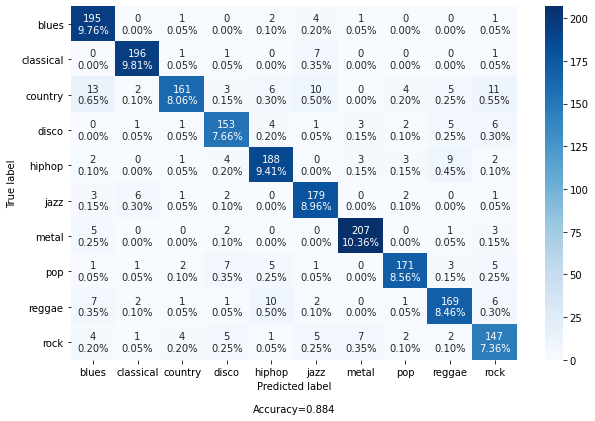

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2208 - accuracy: 0.5733
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.8082 - accuracy: 0.7202
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6768 - accuracy: 0.7664
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5835 - accuracy: 0.7984
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.8227
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4559 - accuracy: 0.8446
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4063 - accuracy: 0.8636
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3645 - accuracy: 0.8771
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3340 - accuracy: 0.8873
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2986 - accura

800/800 [==============================] - 1s 1ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0092 - accuracy: 0.9980: 0s - loss: 0
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0132 - accuracy: 0.9960
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0631 - accuracy: 0.9796
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0175 - accuracy: 0.9951
Epoch 86/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0120 - accuracy: 0.9965
Epoch 87/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0165 - accuracy: 0.9954
Epoch 88/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0484 - accuracy: 0.9844
Epoch 89/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0247 - accuracy: 0.9921
Epoch 90/100
800/800 [==============================] - 1s 1ms/step - loss: 0.012

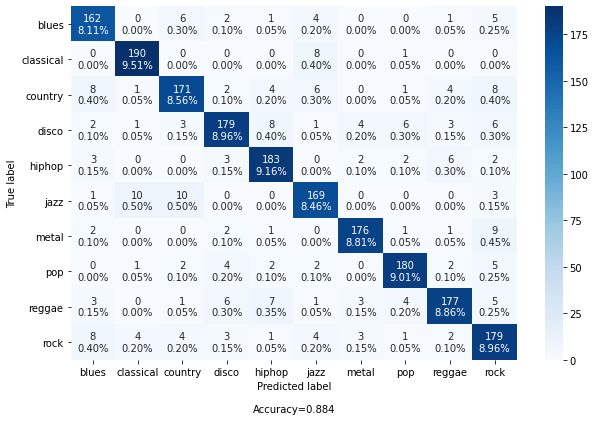

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2379 - accuracy: 0.5657
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.8037 - accuracy: 0.7287
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6672 - accuracy: 0.7765: 0s - loss: 0.6681 - accuracy: 0.77
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5842 - accuracy: 0.8072
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5127 - accuracy: 0.8285
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4585 - accuracy: 0.8456
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4060 - accuracy: 0.8675
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3704 - accuracy: 0.8774
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3355 - accuracy: 0.8903
Epoch 10/100
800/800 [==============================] -

800/800 [==============================] - 1s 1ms/step - loss: 0.0092 - accuracy: 0.9972
Epoch 81/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0165 - accuracy: 0.9951
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0180 - accuracy: 0.9940: 0s - loss: 0.0191 - accura
Epoch 84/100
800/800 [==============================] - 2s 2ms/step - loss: 0.0230 - accuracy: 0.9939
Epoch 85/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0274 - accuracy: 0.9917
Epoch 86/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9912
Epoch 87/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0093 - accuracy: 0.9979
Epoch 88/100
800/800 [==============================] - 2s 2ms/step - loss: 0.0132 - accuracy: 0.9962
Epoch 89/100
800/800 [==============================] - 1s 2ms/step

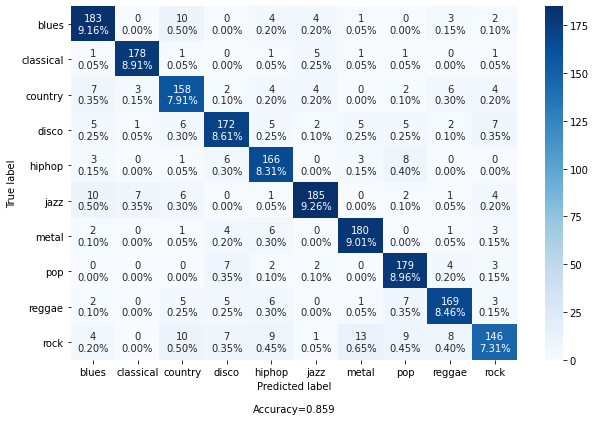

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2076 - accuracy: 0.5762: 0s
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.7971 - accuracy: 0.7275
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6589 - accuracy: 0.7720
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.8088
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4970 - accuracy: 0.8313
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4435 - accuracy: 0.8534
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3929 - accuracy: 0.8714
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3608 - accuracy: 0.8773
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3230 - accuracy: 0.8905
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2983 - ac

800/800 [==============================] - 1s 1ms/step - loss: 0.0075 - accuracy: 0.9979
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0531 - accuracy: 0.9851
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0135 - accuracy: 0.9951
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0093 - accuracy: 0.9974
Epoch 86/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0298 - accuracy: 0.9909
Epoch 87/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0295 - accuracy: 0.9887
Epoch 88/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9957
Epoch 89/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0131 - accuracy: 0.9965
Epoch 90/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0213 - accuracy: 

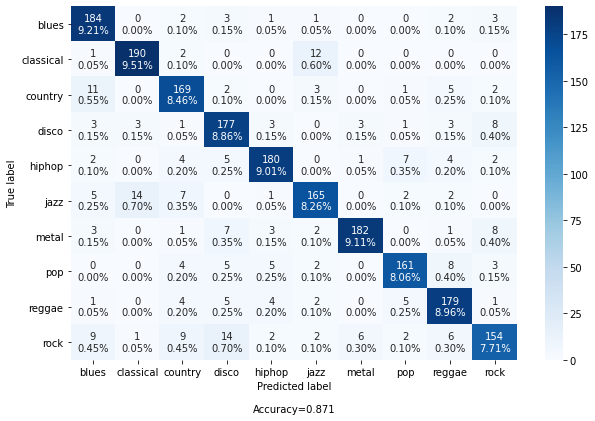

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2196 - accuracy: 0.5687
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.7885 - accuracy: 0.7305
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.6516 - accuracy: 0.7772
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5647 - accuracy: 0.8096
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5037 - accuracy: 0.8312
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4479 - accuracy: 0.8475
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4033 - accuracy: 0.8621
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3721 - accuracy: 0.8753
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3323 - accuracy: 0.8858
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3001 - accura

800/800 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9985
Epoch 81/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9909
Epoch 82/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0408 - accuracy: 0.9862
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0133 - accuracy: 0.9960
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 86/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0144 - accuracy: 0.9961
Epoch 87/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0205 - accuracy: 0.9949: 0s - loss: 0
Epoch 88/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0298 - accuracy: 0.9904
Epoch 89/100
800/800 [==============================] - 1s 1ms/step - loss: 0.015

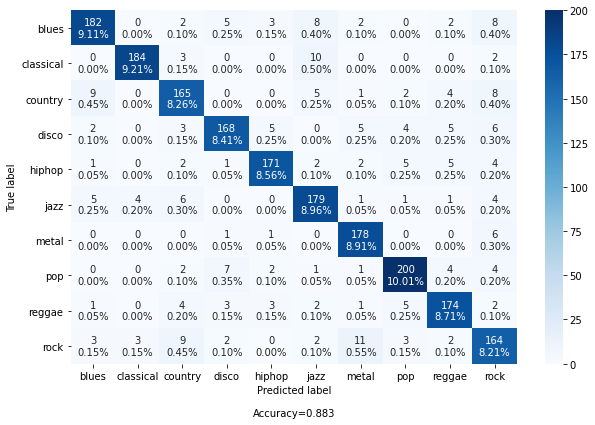

In [12]:
kf=KFold(n_splits=5, shuffle=True, random_state=True)

for train_index,test_index in kf.split(X):
  X_train_kf,X_test_kf,y_train_kf,y_test_kf=X[train_index],X[test_index],y[train_index],y[test_index]
  fit_predict_print(nn_fit_predict,X_train_kf,y_train_kf,X_test_kf,y_test_kf)

### 3.3. Running NN

Epoch 1/100
800/800 [==============================] - 1s 1ms/step - loss: 1.2098 - accuracy: 0.5766
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.7943 - accuracy: 0.7235: 0s - loss: 0.8021 - accura
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.6612 - accuracy: 0.7713
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5713 - accuracy: 0.8069: 0s - loss: 0.5712 - accuracy: 0.
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.5017 - accuracy: 0.8266
Epoch 6/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4424 - accuracy: 0.8472
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3944 - accuracy: 0.8656
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3565 - accuracy: 0.8778
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3202 - accuracy: 0.8941
Epoch 10/100
800/800 [=======

800/800 [==============================] - 1s 1ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 80/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0225 - accuracy: 0.9947
Epoch 81/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0220 - accuracy: 0.9939
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0330 - accuracy: 0.9885
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0236 - accuracy: 0.9919
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0202 - accuracy: 0.9927
Epoch 86/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0145 - accuracy: 0.9954
Epoch 87/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0135 - accuracy: 0.9959
Epoch 88/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0389 - accuracy: 

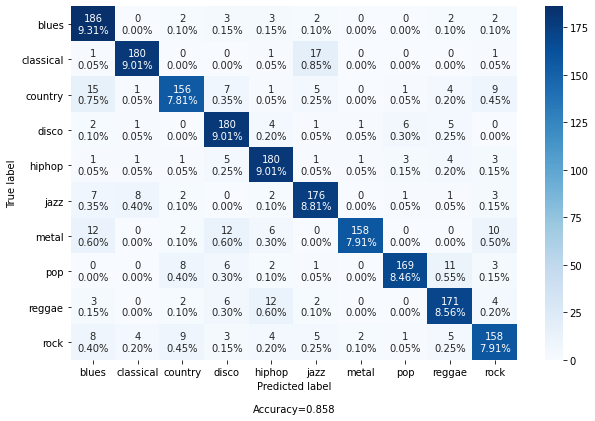

In [13]:
X_train_2, y_train_2 = load_preprocess_xy('data/train.csv',0, True, True, True)
X_test_2, y_test_2 = load_preprocess_xy('data/test.csv',0, True, True, True)

fit_predict_print(nn_fit_predict,X_train_2,y_train_2,X_test_2,y_test_2)

# 4. SVM

In [14]:
from svm import *

Accuracy:  89.23923923923924


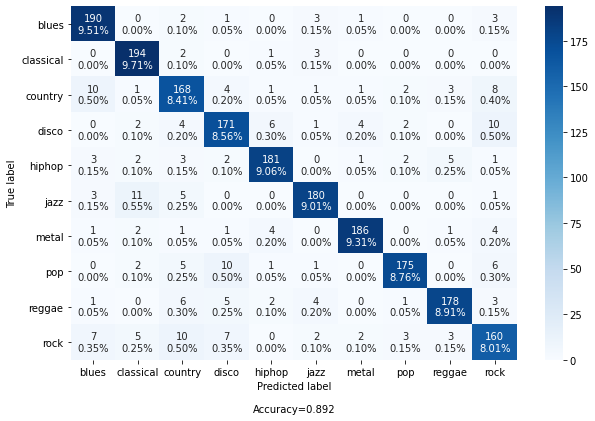

In [15]:
fit_predict_print(svm_fit_predict, X_train, y_train, X_test, y_test)

**References**

1. Data source: https://www.kaggle.com/imchentouf/gtzan-music-genre-classification/data
2. Confusion matrix source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea